In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

data = pd.read_csv('./2025_10_20/best.csv')

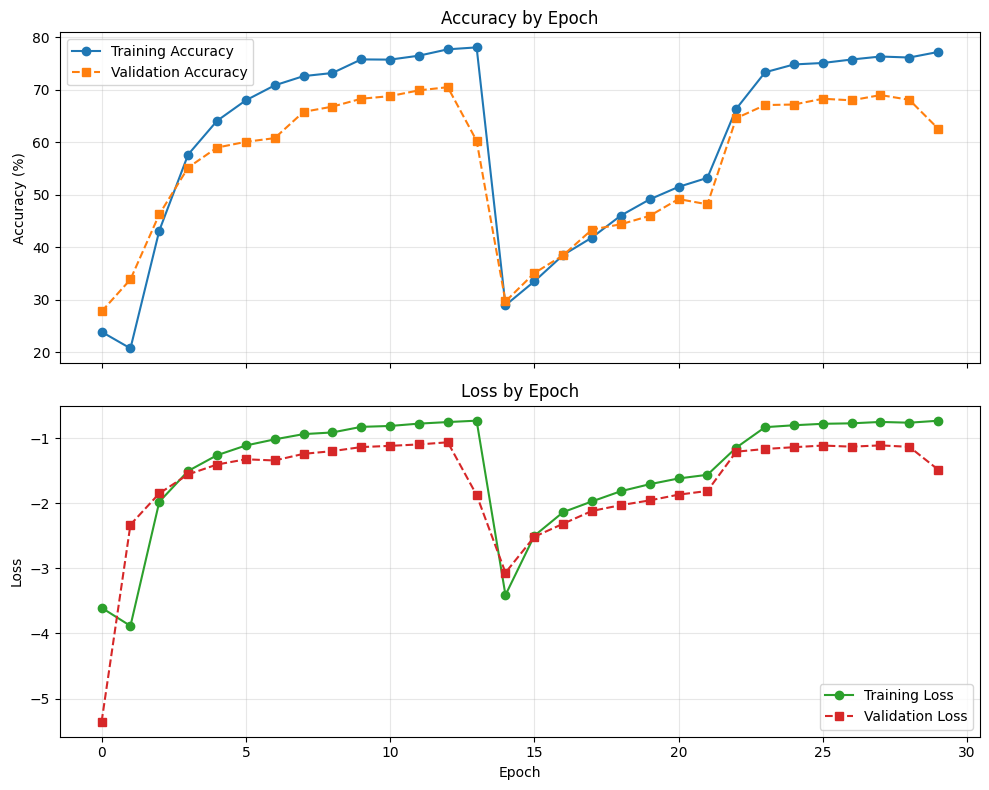

In [2]:
# Plot Accuracy and Loss vs Epoch (uses existing `data`, `plt`, `pd`, `np`)
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

x = data['Epoch']

# Accuracy plot
axes[0].plot(x, data['Training_Accuracy'], marker='o', linestyle='-', label='Training Accuracy', color='C0')
axes[0].plot(x, data['Validation_Accuracy'], marker='s', linestyle='--', label='Validation Accuracy', color='C1')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_title('Accuracy by Epoch')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Loss plot
axes[1].plot(x, data['Training_Loss'], marker='o', linestyle='-', label='Training Loss', color='C2')
axes[1].plot(x, data['Validation_Loss'], marker='s', linestyle='--', label='Validation Loss', color='C3')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss by Epoch')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [3]:
# Compute and display maximum training and validation accuracies and their epoch(s)
train_max = data['Training_Accuracy'].max()
train_epochs = data.loc[data['Training_Accuracy'] == train_max, 'Epoch'].tolist()

val_max = data['Validation_Accuracy'].max()
val_epochs = data.loc[data['Validation_Accuracy'] == val_max, 'Epoch'].tolist()

print(f"Training Accuracy max: {train_max:.2f}% at epoch(s): {train_epochs}")
print(f"Validation Accuracy max: {val_max:.2f}% at epoch(s): {val_epochs}")

Training Accuracy max: 78.08% at epoch(s): [13]
Validation Accuracy max: 70.50% at epoch(s): [12]


In [17]:
import numpy as np
d = np.load('Datasets/Images/Training_Dataset.npy')
d = d * 0 + np.max(d)

np.save('Datasets2/Images/Training_Dataset.npy', d)
np.save('Datasets2/Images/Test_Dataset.npy', d)
np.save('Datasets2/Images/Validation_Dataset.npy', d)

l = np.zeros((1000,1,10), dtype=np.uint8)
l[:,:,0] = 1

np.save('Datasets2/Labels/Training_Dataset.npy', l)
np.save('Datasets2/Labels/Test_Dataset.npy', l)
np.save('Datasets2/Labels/Validation_Dataset.npy', l)

print(d.dtype)


float32


In [15]:
d = np.load('Datasets/Images/Training_Dataset.npy')
print(d.shape)

l = np.load('Datasets/Labels/Training_Dataset.npy')
print(l.shape)
print(d.dtype)

(60000, 1, 28, 28)
(60000, 1, 10)
float32


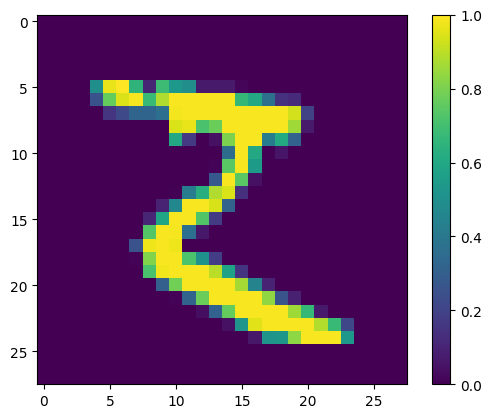

In [14]:
# print first image in d
plt.imshow(d[0].squeeze())
plt.colorbar()
plt.show()

(10, 1, 200, 672)


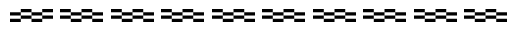

In [11]:
# Create custom mask
import matplotlib.pyplot as plt
orig_mask = np.load('source/Assets/phy8.npy')
print(orig_mask.shape)

H, W = orig_mask.shape[-2], orig_mask.shape[-1]

checker_height = H // 4
checker_width  = W // 4

# Create checkerboard pattern with each square of size (checker_height, checker_width)
pattern = np.zeros((H, W), dtype=orig_mask.dtype)
for i in range(4):
    for j in range(4):
        if (i + j) % 2 == 0:
            pattern[i*checker_height:(i+1)*checker_height, j*checker_width:(j+1)*checker_width] = 1

inv_pattern = 1 - pattern

# First index has pattern, else has inverse pattern
final_mask = np.zeros_like(orig_mask)
for i in range(orig_mask.shape[0]):
    if i == 0:
        final_mask[i,0] = pattern
    else:
        final_mask[i,0] = inv_pattern

# Print each pattern
for i in range(final_mask.shape[0]):
    plt.subplot(1, final_mask.shape[0], i+1)
    plt.imshow(final_mask[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.show()

# Save as .npy file
np.save('source/Assets/custom_checkerboard_mask.npy', final_mask)
